# Part I - (Ford GoBike System Data)
## by (Mahmoud Elsafy)

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
 
## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
# Load the dataset
df = pd.read_csv('fordgobike-tripdata.csv')

In [3]:
# Print the head of dataset
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# Checking dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


* Need to change the datatype of some columns like ('start_time','end_time',...).

* Getting duration per minutes or hours.

* Getting the month , day , hour from 'start_time'&'end_time' columns.

* Remove unmecessary columns.

In [5]:
# Checking number of rows and columns in the dataset
df.shape

(183412, 16)

In [10]:
# Checking data describe 
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


* Need to check the min of member birth year.

* Getting the Age of riders from 'member_birth_year'.

In [11]:
# Review user_type values
df.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [12]:
# Review member_gender values
df.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [13]:
# Checking duplicates values
df.duplicated().sum()

0

In [14]:
# Checking Null values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

* There are null values need to drop it.

In [15]:
# Create a copy of original dataset to cleaning it.
gobike = df.copy()

In [16]:
# Drop null values
gobike.dropna(inplace=True)

In [17]:
gobike.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [18]:
gobike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.7+ MB


In [19]:
# Convert the datatype of 'start_time'  & 'end_time' to datetime
gobike.start_time = pd.to_datetime(gobike.start_time)
gobike.end_time = pd.to_datetime(gobike.end_time)

In [20]:
# Convert the datatype of 'member_birth_year' to int
gobike.member_birth_year = gobike.member_birth_year.astype(int)

In [21]:
# convert the dataype of 'start_station_id' & 'end_station_id' to int
gobike.start_station_id = gobike.start_station_id.astype(int)
gobike.end_station_id = gobike.end_station_id.astype(int)

In [22]:
gobike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null int64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null int64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null int64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: datetime64[ns](2), float64(4), int64(5), object(5)
memory usage: 2

In [23]:
gobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No


In [24]:
# Change 'member_brith_year' column name to 'age' and getting the age
gobike['age'] = 2022 - gobike.member_birth_year

In [25]:
gobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,38
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,50
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,33
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,48
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,63


In [26]:
gobike.age.describe()

count    174952.000000
mean         37.196865
std          10.118731
min          21.000000
25%          30.000000
50%          35.000000
75%          42.000000
max         144.000000
Name: age, dtype: float64

In [27]:
# Checking how many riders over 70 age
max_age = gobike.query('age >= 70').count()[0]
max_age

1221

There are riders who are older than 70, I will be contented with those under 70 age and drop the rest.

In [28]:
# Drop the riders who are over 70 age
gobike = gobike.query('age <= 70')

In [29]:
# Review age describe after drop over 70 age
gobike.age.describe()

count    173920.000000
mean         36.947476
std           9.561944
min          21.000000
25%          30.000000
50%          35.000000
75%          42.000000
max          70.000000
Name: age, dtype: float64

In [30]:
# Convert 'duration_sec' to be per mins and hours
gobike['duration_min'] = gobike.duration_sec/60
gobike.duration_min = gobike.duration_min.astype(int)

In [31]:
gobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,38,869
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,50,1030
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,33,608
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,48,26
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,63,29


In [32]:
# Create new coulumns containts that 'month, day, hour' for the trip
gobike['trip_date'] = gobike.start_time.dt.strftime('%Y-%m-%d')
gobike['trip_month'] = gobike.start_time.dt.strftime('%B')
gobike['trip_day'] = gobike.start_time.dt.strftime('%A')
gobike['trip_hour'] = gobike.start_time.dt.strftime('%H')

In [33]:
gobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,duration_min,trip_date,trip_month,trip_day,trip_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,...,Customer,1984,Male,No,38,869,2019-02-28,February,Thursday,17
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972,Male,No,50,1030,2019-02-28,February,Thursday,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,...,Subscriber,1989,Other,No,33,608,2019-02-28,February,Thursday,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,...,Subscriber,1974,Male,Yes,48,26,2019-02-28,February,Thursday,23
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,...,Subscriber,1959,Male,No,63,29,2019-02-28,February,Thursday,23


In [34]:
# Review trip_day values
gobike.trip_day.value_counts()

Thursday     33525
Tuesday      30427
Wednesday    28294
Friday       27493
Monday       25474
Sunday       14378
Saturday     14329
Name: trip_day, dtype: int64

In [35]:
# review trip_month values
gobike.trip_month.value_counts()

February    173920
Name: trip_month, dtype: int64

In [36]:
gobike.trip_date.describe()

count         173920
unique            28
top       2019-02-28
freq            9401
Name: trip_date, dtype: object

* The dataset for one month only (Feb) in 2019 year.

In [37]:
# Drop unnecessary coulmns
gobike.drop(['start_station_latitude','start_station_longitude',
             'end_station_latitude','end_station_longitude',
             'bike_share_for_all_trip'],axis=1, inplace=True)

In [38]:
gobike.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,age,duration_min,trip_date,trip_month,trip_day,trip_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,4902,Customer,1984,Male,38,869,2019-02-28,February,Thursday,17
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,50,1030,2019-02-28,February,Thursday,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,70,Central Ave at Fell St,6638,Subscriber,1989,Other,33,608,2019-02-28,February,Thursday,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,4898,Subscriber,1974,Male,48,26,2019-02-28,February,Thursday,23
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,323,Broadway at Kearny,5200,Subscriber,1959,Male,63,29,2019-02-28,February,Thursday,23
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300,Palm St at Willow St,312,San Jose Diridon Station,3803,Subscriber,1983,Female,39,19,2019-02-28,February,Thursday,23
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10,Washington St at Kearny St,127,Valencia St at 21st St,6329,Subscriber,1989,Male,33,26,2019-02-28,February,Thursday,23
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10,Washington St at Kearny St,127,Valencia St at 21st St,6548,Subscriber,1988,Other,34,26,2019-02-28,February,Thursday,23
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19,Post St at Kearny St,121,Mission Playground,6488,Subscriber,1992,Male,30,17,2019-02-28,February,Thursday,23
10,458,2019-02-28 23:57:57.211,2019-03-01 00:05:35.435,370,Jones St at Post St,43,San Francisco Public Library (Grove St at Hyde...,5318,Subscriber,1996,Female,26,7,2019-02-28,February,Thursday,23


In [39]:
gobike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173920 entries, 0 to 183411
Data columns (total 17 columns):
duration_sec          173920 non-null int64
start_time            173920 non-null datetime64[ns]
end_time              173920 non-null datetime64[ns]
start_station_id      173920 non-null int64
start_station_name    173920 non-null object
end_station_id        173920 non-null int64
end_station_name      173920 non-null object
bike_id               173920 non-null int64
user_type             173920 non-null object
member_birth_year     173920 non-null int64
member_gender         173920 non-null object
age                   173920 non-null int64
duration_min          173920 non-null int64
trip_date             173920 non-null object
trip_month            173920 non-null object
trip_day              173920 non-null object
trip_hour             173920 non-null object
dtypes: datetime64[ns](2), int64(7), object(8)
memory usage: 23.9+ MB


In [40]:
gobike.shape

(173920, 17)

### What is the structure of your dataset?

> The dataset contains 17,3920 rows and 17 columns that repersent the bike riders in San Francisco Bay area with the following importaent vaariables:

- Trip Duration (minutes).

- Start Station (Time,Name) and End Stations (Time,Name).

- User Type ('Subscriber' = Member , 'Customer' = Casual).

- Member Birth Year and Age.

- Member Gender.


### What is/are the main feature(s) of interest in your dataset?

> I'm interested in feature out the factors of trip duration in comparing with different genders and the differences between the user type (Subscribed and Customer).

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Trip Duration, the date of Start Time (year,month,day,hours), User Type, The Age of Riders and Gender.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


### What is the average of duration per Second?

In [41]:
# Checking duration_sec describe
gobike.duration_sec.describe()

count    173920.000000
mean        704.223149
std        1645.440119
min          61.000000
25%         323.000000
50%         511.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

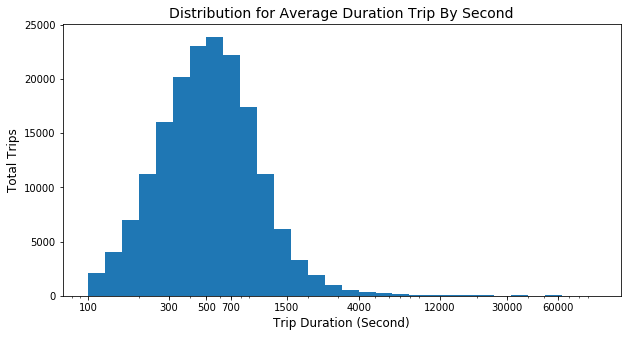

In [42]:
# plot the durations for trip by second
plt.figure(figsize=[10,5])
bins = 10**np.arange(2, 5.0 + 0.1, 0.1)
plt.hist(data=gobike,x= 'duration_sec', bins=bins)
ticks = [100, 300, 500 ,700, 1500, 4000, 12000, 30000, 60000]
labels = ['{}'.format(val) for val in ticks]
plt.xscale('log')
plt.xticks(ticks, labels)
plt.title('Distribution for Average Duration Trip By Second', size=14)
plt.xlabel('Trip Duration (Second)', size=12)
plt.ylabel('Total Trips', size=12);

> The average duration of bike trip per second is around 700(Sec)

### What is the average of duration per Minutes?

In [43]:
# Cheching durstion_min describe
gobike.duration_min.describe()

count    173920.000000
mean         11.245090
std          27.425233
min           1.000000
25%           5.000000
50%           8.000000
75%          13.000000
max        1409.000000
Name: duration_min, dtype: float64

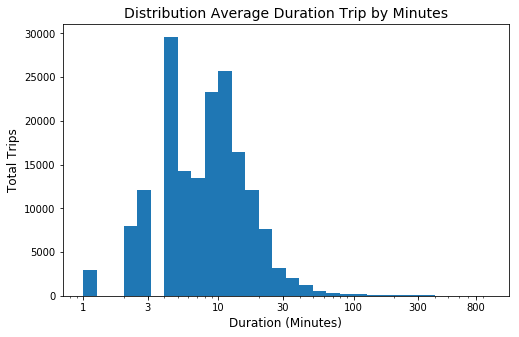

In [44]:
# plot the durations for trip by minutes
plt.figure(figsize=[8,5])
bins = 10**np.arange(0 , 3 + 0.1 , 0.1)
ticks = [1, 3, 10, 30, 100, 300, 800]
labels = ['{}'.format(i) for i in ticks]
plt.hist(data = gobike, x='duration_min', bins=bins)
plt.xscale('log')
plt.xticks(ticks,labels)
plt.xlabel('Duration (Minutes)', size=12)
plt.title('Distribution Average Duration Trip by Minutes', size = 14)
plt.ylabel('Total Trips', size=12);

> The average duration of bike trip by minutes is around 11.24 (Min).

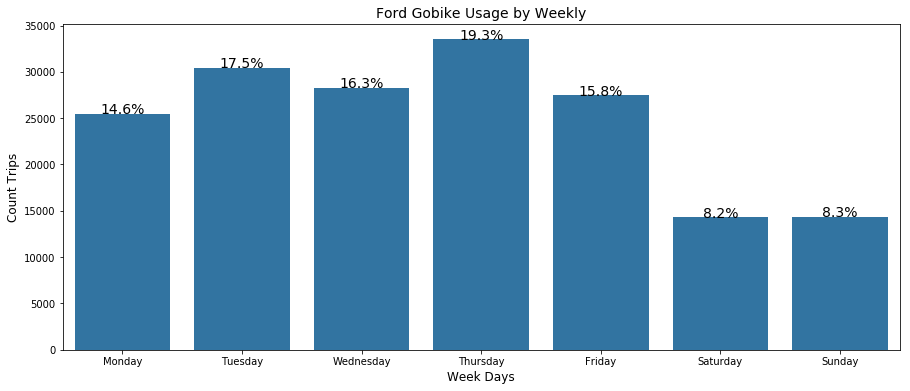

In [45]:
# Review total trips by weekly
plt.figure(figsize=[15,6])
sort_days = ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
color = sb.color_palette()[0]
sb.countplot(data=gobike, x='trip_day', color=color,order=sort_days)
plt.xlabel('Week Days', size=12)
plt.title('Ford Gobike Usage by Weekly', size=14)
plt.ylabel('Count Trips', size=12)
day_count = gobike.trip_day.value_counts()
total_trips = day_count.sum()
locs, labels = plt.xticks(size=10)
for loc, label in zip(locs, labels):
    count = day_count[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/total_trips)
    plt.text(loc, count+10, pct_string, ha='center', color = 'black', fontsize=14);

> As we see clearly the usage bikes is down in the weekend days (Sat & Sun), and coming rise up in weekdays (working days).

### What is the peak time of trips during the day hours?

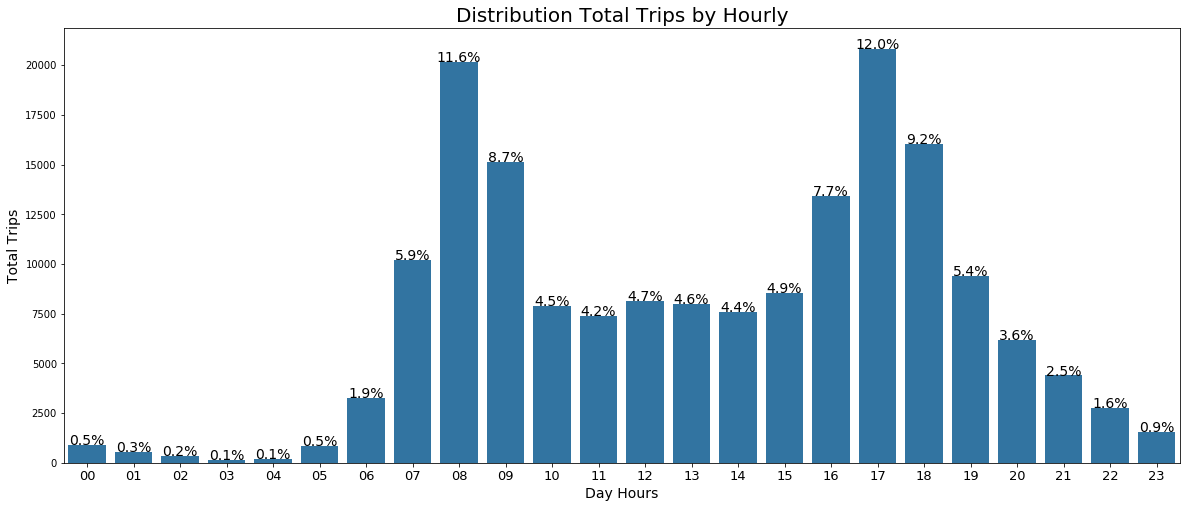

In [46]:
# Review the count of trips by hourly
plt.figure(figsize=[20,8])
sb.countplot(data=gobike, x='trip_hour', color=color)
plt.xlabel('Day Hours', size=14)
plt.ylabel('Total Trips', size=14)
plt.title('Distribution Total Trips by Hourly', size=20)
hour_count = gobike.trip_hour.value_counts()
total_trips = hour_count.sum()
locs, labels = plt.xticks(size=13)
for loc, label in zip(locs, labels):
    count = hour_count[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/total_trips)
    plt.text(loc, count+10, pct_string, ha= 'center', color = 'black', fontsize=14);

> As we see, the peak time start around 08:00 AM and 05:00 PM, it's make sense because most of the jobs start and end in the same time.

### What are the range and average of riders ages? 

In [47]:
# Age describe
gobike.age.describe()

count    173920.000000
mean         36.947476
std           9.561944
min          21.000000
25%          30.000000
50%          35.000000
75%          42.000000
max          70.000000
Name: age, dtype: float64

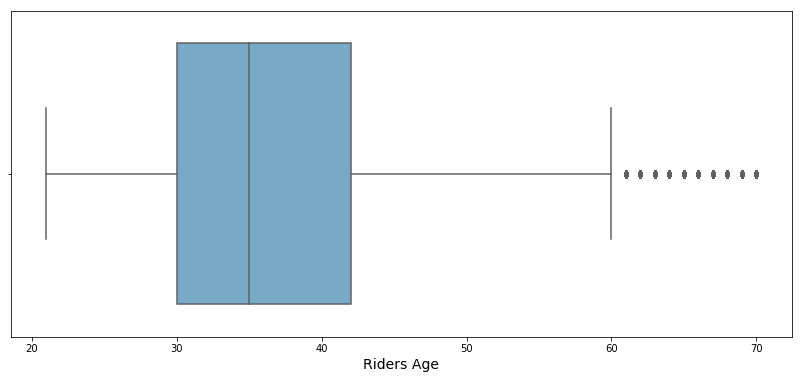

In [48]:
# Review Rider Age
plt.figure(figsize=[14,6])
sb.boxplot(data=gobike,x='age', palette='Blues')
plt.xlabel('Riders Age', size=14);

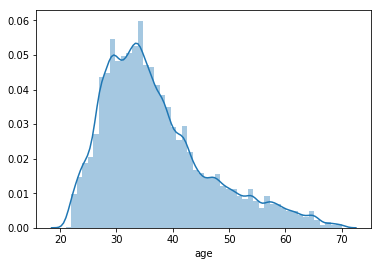

In [49]:
sb.distplot(gobike.age);

> As we see here the range of age is between 21 to 60 age, with outliers between 60 to 70 age, and that makes sense, the most common age is between the bike riders 30 to 42 age.

### What is the most common start station name among riders?

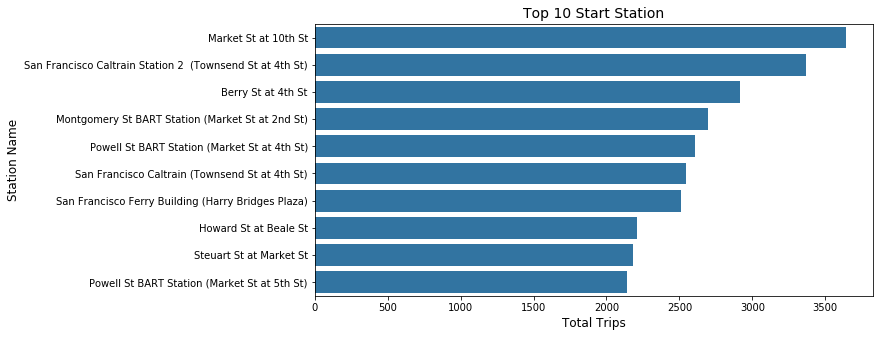

In [50]:
# Review most start station name for riders
plt.figure(figsize=[10,5])
top_st_station = gobike.start_station_name.value_counts()[:10]
top_st = top_st_station.index
sb.countplot(data=gobike, y='start_station_name', color=color, order=top_st)
plt.xlabel('Total Trips', size=12)
plt.ylabel('Station Name', size=12)
plt.title('Top 10 Start Station', size=14);

> The most start station name at (Market St at 10th St) with more than 3,500 trips. 

### What is the most common end station name among riders?

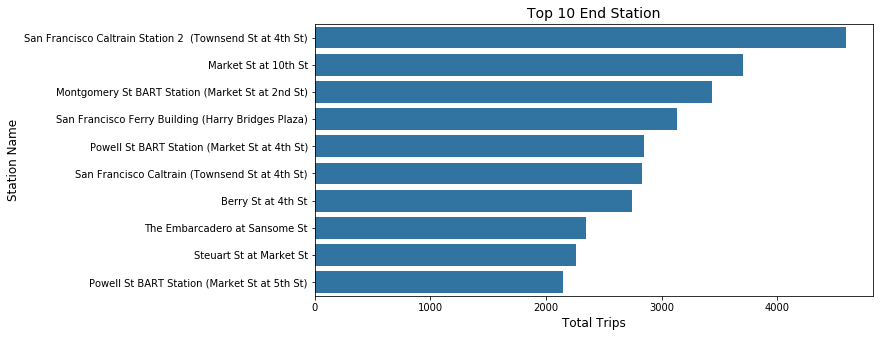

In [51]:
# Review most end stations name for riders
plt.figure(figsize=[10,5])
top_en_station = gobike.end_station_name.value_counts()[:10]
top_en = top_en_station.index
sb.countplot(data=gobike, y='end_station_name',color=color, order=top_en)
plt.xlabel('Total Trips', size=12)
plt.ylabel('Station Name', size=12)
plt.title('Top 10 End Station', size=14);

> The most end station name at (San Francisco Station) with more than 4,000 trips.



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I transformed the duration second to by minutes to be readable easy and created a new column containing the rider age as per the birth year column, and created also a new columns that containing trip weekdays and day hour. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I sorted the days of the week so that they start on Monday, the first working day of the week in San Francisco Bat area.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### What is the percentage for each user type?

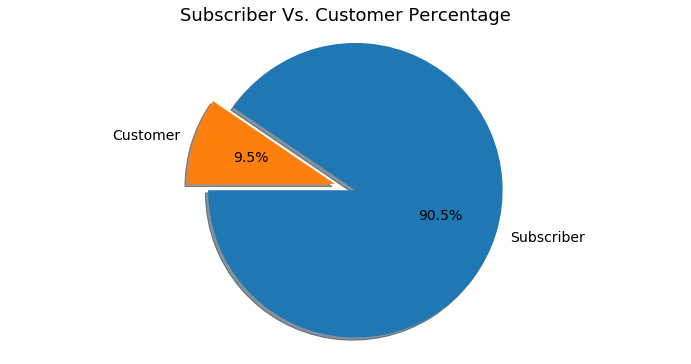

In [52]:
# Check the Percentage of bike riders type betweet (Subscriber & Customer)
plt.figure(figsize=[12,6])
bike_user = gobike.user_type.value_counts()
labels = ['Subscriber', 'Customer']
explode = (0, 0.16)
plt.pie(bike_user, radius=1.1, labels=labels,explode=explode, startangle=180, autopct='%0.1f%%', textprops = {'fontsize': 14}, shadow=True)
plt.title('Subscriber Vs. Customer Percentage', size=18)
plt.axis('equal');

> As we see, most of bike riders are Subscriber 'Member' with (90.5%) and the rest of bike riders are Customer with (9.5%).

### What is the percentage for each member gender?

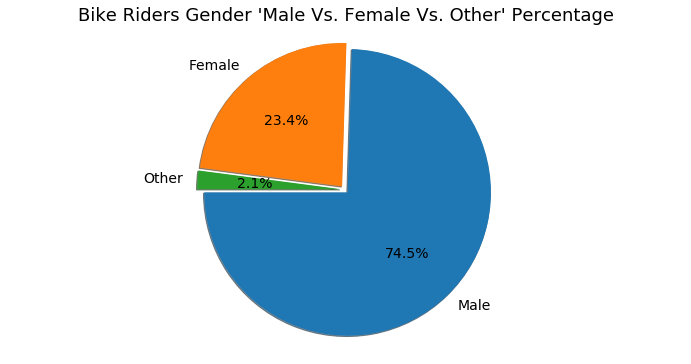

In [53]:
# Check the percentage of bike riders gender between (Male & Female & Other)
plt.figure(figsize=[12,6])
gender = gobike.member_gender.value_counts()
labels = ['Male', 'Female', 'Other']
explode = (0.10,0.10, 0.10)
plt.pie(gender, radius=3.5, labels=labels, explode=explode, startangle=180, autopct='%0.1f%%', textprops={'fontsize': 14}, shadow=True)
plt.title("Bike Riders Gender 'Male Vs. Female Vs. Other' Percentage", size=18)
plt.axis('equal');

> As we see, it's clear the Male gender is the most bike riders by (74.5%) and Female riders the second by (23.4%).

### What is the most common user type?, what his gender ?

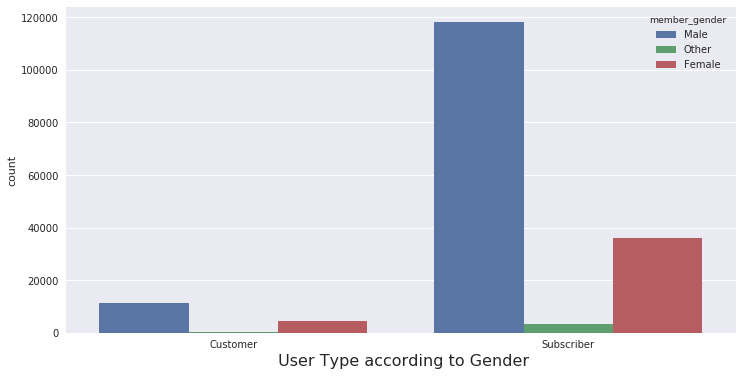

In [59]:
# Review the relation between User Type and Member Gender  
plt.figure(figsize=[12,6])
sb.set(style='darkgrid')
sb.countplot(x=gobike.user_type, hue='member_gender', data=gobike)
plt.xlabel(' User Type according to Gender', size=16);

> In this chart the most of bike user is male gender and most of them are subscriber.

### Is there any difference between the age of bike users and the different gender?

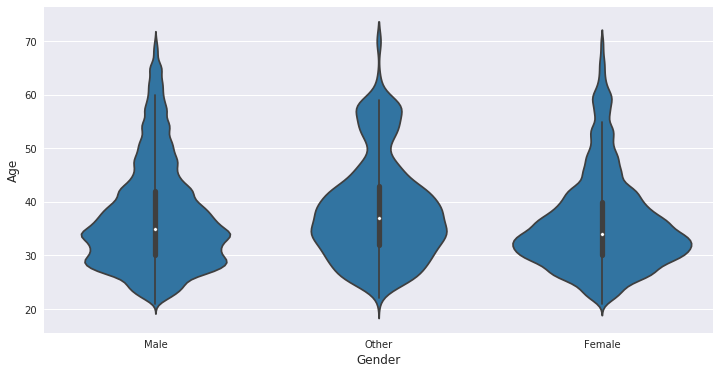

In [57]:
# Review the relation between Age and Gender
plt.figure(figsize=[12,6])
sb.violinplot(data=gobike, x='member_gender', y='age', color=color, size=15)
plt.xlabel('Gender', size=12)
plt.ylabel('Age', size=12);

> As we see, There is not a huge difference average age between Male and Female, but a little high for Other.

### Which of user type has the long trip duration?

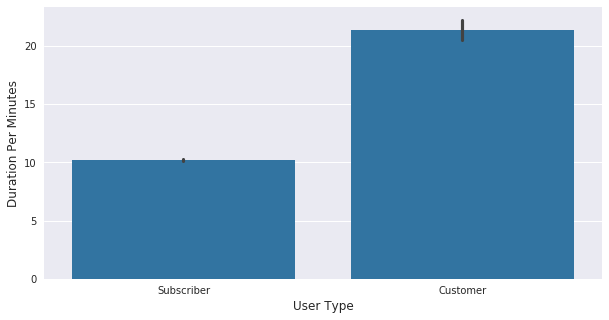

In [56]:
# Checking the distripution trip duration per minutes according to user type
plt.figure(figsize=[10,5])
bike_type = gobike.user_type.value_counts().index
sb.barplot(y='duration_min', x='user_type', data=gobike,color=color,order=bike_type)
plt.xlabel('User Type',size=12)
plt.ylabel('Duration Per Minutes', size=12);

> As we see clearly, the Customer bike user spend more time than Subscriber user.

### What is the peak time for each user type during the hours of the day?

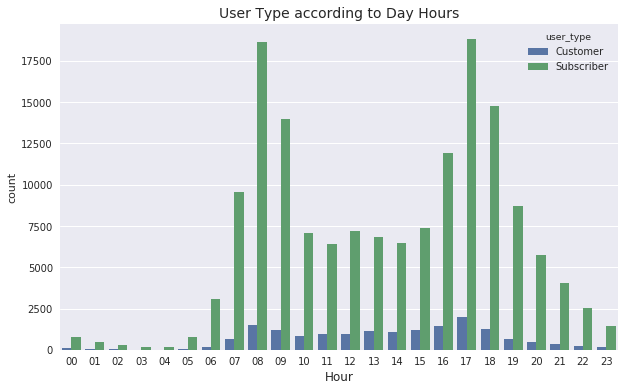

In [69]:
# Review the User Type Vs. Trip day hours
plt.figure(figsize=[10,6])
sb.countplot(x=gobike.trip_hour, hue='user_type', data=gobike)
plt.xlabel('Hour', size=12)
plt.title('User Type according to Day Hours', size=14);

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


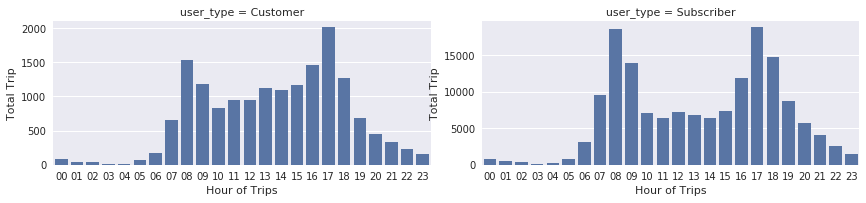

In [85]:
# Review the relations beteewn User type and Hour of Trips separately to be more clear
i = sb.FacetGrid(data=gobike,col='user_type',col_wrap=2,aspect=2,sharey=False)
i.map(sb.countplot,'trip_hour')
for v in range(2):
    i.axes[v].set_xlabel('Hour of Trips')
    i.axes[v].set_ylabel('Total Trip');

> Subscriber bike users seem to have lower trips between 10 AM till 3 PM, and Customer bike users seem to have higher trips than Subscriber users during the same hours. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The number of subscriber user type is larger than Customer user type, but on another side, the Customer users spend more time on the ride than Sunscriber user. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Subscriber bike users seem to have lower trips between 10 AM till 3 PM, and Customer bike users seem to have higher trips than Subscriber users during the same hours.

## Multivariate Exploration


### Which gender has the longest trips duration during the weekdays?

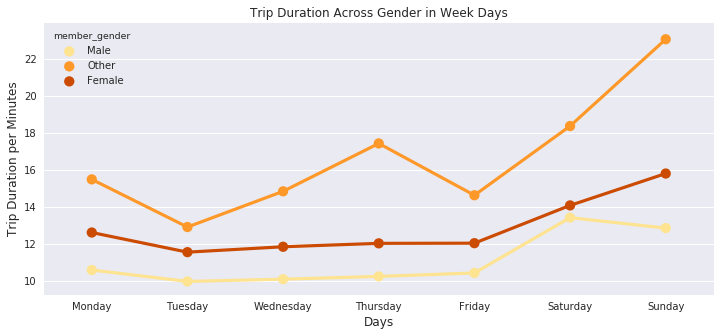

In [98]:
# Review the relation between Gender and Duration per minutes during the Weekdays
plt.figure(figsize=[12,5])
sb.pointplot(data=gobike, x='trip_day', y='duration_min', hue='member_gender', palette='YlOrBr', ci=None, order=sort_days)
plt.xlabel('Days', size=12)
plt.ylabel('Trip Duration per Minutes', size=12)
plt.title('Trip Duration Across Gender in Week Days', size=12);

> The Other gender in general tend to have much longer trips, especially on the weekend (Sat & Sun) and the second is Female.

### Which is the user type that has the longest duration of trips during the weekdays?

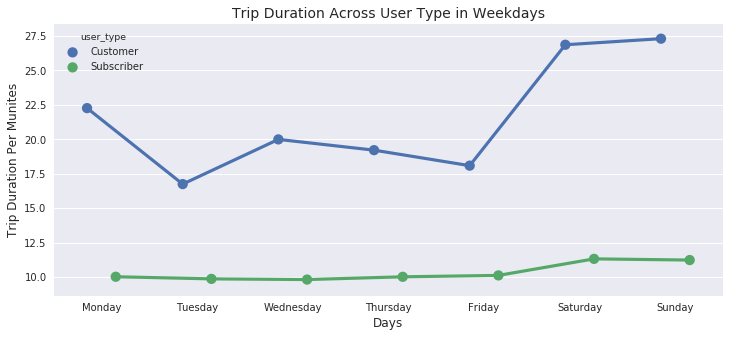

In [106]:
# Review The Trip Duration in Weekdays between Subscriber and Customer
plt.figure(figsize=[12,5])
sb.pointplot(data=gobike, x='trip_day', y='duration_min', hue='user_type', dodge=0.3, order=sort_days, ci=None)
plt
plt.xlabel('Days', size=12)
plt.ylabel('Trip Duration Per Munites', size=12)
plt.title('Trip Duration Across User Type in Weekdays', size=14);

> As we see, The Customer user type tend to have much longer trips, especially on the weekend (Sat & Sun).

### What are the highest and lowest average trip duration for each user type and gender?

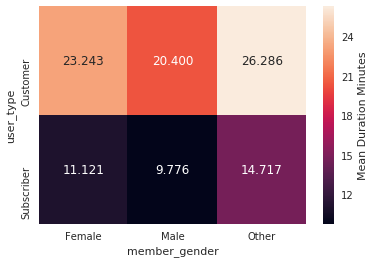

In [124]:
# Review the heatmap to display the average duration trips for each user type and gender
means = gobike.groupby(['user_type', 'member_gender']).mean()['duration_min']
means = means.reset_index(name='bike_id')
means = means.pivot(index='user_type', columns='member_gender', values='bike_id')
sb.heatmap(means,annot=True,fmt='.3f',cbar_kws={'label':'Mean Duration Minutes'});

> The Other gender (Customer user type) has the highest average (26,286)mins and the  lowest for Male gender (Subscriber user type) with (9.776)mins.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The Other gender in general tend to have much longer trips, especially on the weekend (Sat & Sun) and the second is Female, and The Customer user type tend to have much longer trips, especially on the weekend (Sat & Sun).

### Were there any interesting or surprising interactions between features?

> the intersting featuers in the Male gender subscriber user type has the lowest average duration munites.

## Conclusions
> There are two types of clients using bikes on daily basis (Subscriber 'Members' and Customer 'Casual' ) and the most user type is Subscriber and most of the Subscriber is Male gender with common ages between 30 to 40.

> The Peak time is in the morning between 7 Am to 8 AM and in the evening between 5 PM to 6 PM.

> The Customer user type spends more time on trips especially the Other gender unlike Subscriber user type male gender.

> The middle of week increases the demand for bike user, unlike the weekend. 


In [125]:
gobike_clean = gobike.to_csv('gobike_clean.csv', index=False)